# Tratamiento de nulos en el campo Edad
Siguiendo el trabajo de mi compañero Luca, existen muchos valores nulos en el campo de edad que habrá de tratar.

## Hipótesis
La predicción de la edad solo será la del conductor, que es quién determina lógicamente tiene más correlación con el número de accidentes.

Para predecir el campo de la edad se tendrán en cuenta las siguientes variables del csv Accidentes_20XX
1. La edad de los demás pasajeros: La edad de los demás pasajeros guarda relación con la edad del conductor. Un conductor jóven es más improbable que lleve a pasajeros menores de edad que un conductor más mayor.
2. La fecha y hora del accidente: Es posible que la fecha y la hora guarde alguna relación con la edad del conductor.
3. El distrito: Es posible que algunos distritos tengan conductores más jóvenes y otros conductores más mayores.
4. Género: Es posible que existan distinta distribución por edad en relación con el género.
5. Tipo de accidente: Es posible que los jóvenes tengan más accidentes de un tipo que los mayores.
6. Drogas y alcohol: Es posible que los jóvenes sean más propensos a conducir bajo influencia de drogas que las personas más mayores.
7. Tipo de vehículo: Es posible que los vehículos industriales sean conducidos por personas más mayores

A continuación se seleccionan los campos a tratar en el dataframe y se proporciona una vista previa a fin de refrescar al lector sobre la estructura de los datos

In [1]:
import pandas as pd
import numpy as np
from matplotlib.testing.jpl_units import day

accidentes_2022 = pd.read_csv('./Datasets/Data_Combinada.csv')
accidentes_2022.head()

/tmp/ipykernel_12300/417448999.py:5: DtypeWarning: Columns (15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  accidentes_2022 = pd.read_csv('./Datasets/Data_Combinada.csv')


,num_expediente,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,tipo_persona,rango_edad,sexo,cod_lesividad,lesividad,coordenada_x_utm,coordenada_y_utm,positiva_alcohol,positiva_droga,fugado
0,2022S000001,01/01/2022,1:30:00,"AVDA. ALBUFERA, 19",19,13.0,PUENTE DE VALLECAS,Alcance,Despejado,Turismo,Conductor,De 30 a 34 años,M,NaN,NaN,"443359,226","4472082,272",0.0,0.0,No
1,2022S000001,01/01/2022,1:30:00,"AVDA. ALBUFERA, 19",19,13.0,PUENTE DE VALLECAS,Alcance,Despejado,Turismo,Conductor,De 45 a 49 años,H,NaN,NaN,"443359,226","4472082,272",0.0,0.0,No
2,2022S000002,01/01/2022,0:30:00,PLAZA. CANOVAS DEL CASTILLO / PASEO. PRADO,2,3.0,RETIRO,Colisión fronto-lateral,NaN,Motocicleta hasta 125cc,Conductor,De 30 a 34 años,H,NaN,NaN,"441155,351","4474129,588",1.0,0.0,No
3,2022S000002,01/01/2022,0:30:00,PLAZA. CANOVAS DEL CASTILLO / PASEO. PRADO,2,3.0,RETIRO,Colisión fronto-lateral,NaN,Motocicleta hasta 125cc,Pasajero,De 35 a 39 años,M,NaN,NaN,"441155,351","4474129,588",0.0,0.0,No
4,2022S000002,01/01/2022,0:30:00,PLAZA. CANOVAS DEL CASTILLO / PASEO. PRADO,2,3.0,RETIRO,Colisión fronto-lateral,NaN,Turismo,Conductor,De 40 a 44 años,H,NaN,NaN,"441155,351","4474129,588",0.0,0.0,No


### Extracción de campos
A continuación, se extraen los campos num_expediente, fecha y hora, distrito, género, tipo de accidente, drogas y alcohol

In [2]:
df_2022 = accidentes_2022.drop(
    columns=['coordenada_x_utm', 'coordenada_y_utm', 'localizacion', 'numero', 'cod_lesividad', 'estado_meteorológico',
             'lesividad', 'fugado'])
df_2022.head()

,num_expediente,fecha,hora,cod_distrito,distrito,tipo_accidente,tipo_vehiculo,tipo_persona,rango_edad,sexo,positiva_alcohol,positiva_droga
0,2022S000001,01/01/2022,1:30:00,13.0,PUENTE DE VALLECAS,Alcance,Turismo,Conductor,De 30 a 34 años,M,0.0,0.0
1,2022S000001,01/01/2022,1:30:00,13.0,PUENTE DE VALLECAS,Alcance,Turismo,Conductor,De 45 a 49 años,H,0.0,0.0
2,2022S000002,01/01/2022,0:30:00,3.0,RETIRO,Colisión fronto-lateral,Motocicleta hasta 125cc,Conductor,De 30 a 34 años,H,1.0,0.0
3,2022S000002,01/01/2022,0:30:00,3.0,RETIRO,Colisión fronto-lateral,Motocicleta hasta 125cc,Pasajero,De 35 a 39 años,M,0.0,0.0
4,2022S000002,01/01/2022,0:30:00,3.0,RETIRO,Colisión fronto-lateral,Turismo,Conductor,De 40 a 44 años,H,0.0,0.0


## Temporalmente

Eliminar todos los vehículos nulos

In [3]:
df_2022 = df_2022[~df_2022['tipo_vehiculo'].isnull()]
df_2022[df_2022['tipo_vehiculo'].isnull()]

,num_expediente,fecha,hora,cod_distrito,distrito,tipo_accidente,tipo_vehiculo,tipo_persona,rango_edad,sexo,positiva_alcohol,positiva_droga


### Limpieza
Existe un dato redundante, que es el distrito. Se sustituirá por su correspondiente código. Pero antes, vamos a verificar que no existe ningún nulo en la columna cod_distrito

In [4]:
df_2022['cod_distrito'].count() == df_2022['num_expediente'].count()

False

Por tanto, existen tantos no nulos como números de expediente en cod_distrito. Podemos eliminar la columna distrito.

In [5]:
df_2022.pop('distrito')
df_2022.head()

,num_expediente,fecha,hora,cod_distrito,tipo_accidente,tipo_vehiculo,tipo_persona,rango_edad,sexo,positiva_alcohol,positiva_droga
0,2022S000001,01/01/2022,1:30:00,13.0,Alcance,Turismo,Conductor,De 30 a 34 años,M,0.0,0.0
1,2022S000001,01/01/2022,1:30:00,13.0,Alcance,Turismo,Conductor,De 45 a 49 años,H,0.0,0.0
2,2022S000002,01/01/2022,0:30:00,3.0,Colisión fronto-lateral,Motocicleta hasta 125cc,Conductor,De 30 a 34 años,H,1.0,0.0
3,2022S000002,01/01/2022,0:30:00,3.0,Colisión fronto-lateral,Motocicleta hasta 125cc,Pasajero,De 35 a 39 años,M,0.0,0.0
4,2022S000002,01/01/2022,0:30:00,3.0,Colisión fronto-lateral,Turismo,Conductor,De 40 a 44 años,H,0.0,0.0


Para poder tratar correctamente con los datos, vamos a convertir todos los datos posibles en números. Empezamos por positivo_alcohol y positivo_droga, que se cambiarán por 0 y 1.

Esta parte del código nos la propociona el compañero Luca
1. Sustituímos S por 1 y N por 0, Rellenamos los nulos en drogas por 0.
2. Sustituímos Hombre por 1 y Mujer por 0.

In [6]:
# Cambiamos en 'positiva_alcohol'
df_2022['positiva_alcohol'].replace({'S': 1, 'N': 0}, inplace=True)
df_2022['sexo'].replace({'H': 1, 'M': 0}, inplace=True)
# Cambiamos en 'positiva_droga' los nulls
df_2022['positiva_droga'].fillna(0, inplace=True)

df_2022.head()

,num_expediente,fecha,hora,cod_distrito,tipo_accidente,tipo_vehiculo,tipo_persona,rango_edad,sexo,positiva_alcohol,positiva_droga
0,2022S000001,01/01/2022,1:30:00,13.0,Alcance,Turismo,Conductor,De 30 a 34 años,0,0.0,0.0
1,2022S000001,01/01/2022,1:30:00,13.0,Alcance,Turismo,Conductor,De 45 a 49 años,1,0.0,0.0
2,2022S000002,01/01/2022,0:30:00,3.0,Colisión fronto-lateral,Motocicleta hasta 125cc,Conductor,De 30 a 34 años,1,1.0,0.0
3,2022S000002,01/01/2022,0:30:00,3.0,Colisión fronto-lateral,Motocicleta hasta 125cc,Pasajero,De 35 a 39 años,0,0.0,0.0
4,2022S000002,01/01/2022,0:30:00,3.0,Colisión fronto-lateral,Turismo,Conductor,De 40 a 44 años,1,0.0,0.0


Como solo es una entrada la vamos a eliminar

### Tratamiento de fechas
Para que sea posible para nuestro modelo inferir de los datos, preferimos que las fechas y las horas se expresen en valores continuos.
Para lograrlo, vamos a traducir la fecha a minutos desde el 00:00. La fecha se traducirá en días desde el 1-1-20XX.

Necesitamos un dato extra que puede ser interesante agregar, festivos y fines de semana. Se añadirá esa columna con esa información relevante. Seguiremos la siguiente convención con los 14 días festivos anuales de la ciudad de Madrid, por lo que serán 10 festivos nacionales, 2 festivos autonómicos (Com. Madrid) y 2 festivos locales (Madrid).
* Se denotará día laboral por 0, y día festivo o de descanso por 1.


Calcular fines de semana y festivos.

Una rápida búsqueda por internet nos da los 14 días festivos. La fuente es el calendario de laboral de la Agencia Tributaria

In [7]:
from datetime import datetime


def is_work_day(date_str: str) -> int:
    date_format = '%d/%m/%Y'  # Formato para 'dd-MM-yyyy'

    holidays_madrid = ['']  # todo
    try:
        date_obj = datetime.strptime(date_str, date_format)
        day_of_week_int = date_obj.weekday()
        if day_of_week_int == 5 or day_of_week_int == 6 or date_str in holidays_madrid:
            return 0
        return 1

    except ValueError:
        return -1


df_2022['bool_laborable'] = df_2022['fecha'].transform(is_work_day)
df_2022.head()

,num_expediente,fecha,hora,cod_distrito,tipo_accidente,tipo_vehiculo,tipo_persona,rango_edad,sexo,positiva_alcohol,positiva_droga,bool_laborable
0,2022S000001,01/01/2022,1:30:00,13.0,Alcance,Turismo,Conductor,De 30 a 34 años,0,0.0,0.0,0
1,2022S000001,01/01/2022,1:30:00,13.0,Alcance,Turismo,Conductor,De 45 a 49 años,1,0.0,0.0,0
2,2022S000002,01/01/2022,0:30:00,3.0,Colisión fronto-lateral,Motocicleta hasta 125cc,Conductor,De 30 a 34 años,1,1.0,0.0,0
3,2022S000002,01/01/2022,0:30:00,3.0,Colisión fronto-lateral,Motocicleta hasta 125cc,Pasajero,De 35 a 39 años,0,0.0,0.0,0
4,2022S000002,01/01/2022,0:30:00,3.0,Colisión fronto-lateral,Turismo,Conductor,De 40 a 44 años,1,0.0,0.0,0


Procedemos a granular las para que nuestro modelo lo pueda interpretar esos números. Separamos en día, y en mes

In [8]:
def extract_day(date_str: str) -> int:
    date_parts = date_str.split('/')
    if len(date_parts) >= 3:
        return int(date_parts[0])


def extract_month(date_str: str) -> int:
    date_parts = date_str.split('/')
    if len(date_parts) >= 3:
        return int(date_parts[1])


df_2022['day'] = df_2022['fecha'].transform(extract_day)
df_2022['month'] = df_2022['fecha'].transform(extract_month)
df_2022.head()

,num_expediente,fecha,hora,cod_distrito,tipo_accidente,tipo_vehiculo,tipo_persona,rango_edad,sexo,positiva_alcohol,positiva_droga,bool_laborable,day,month
0,2022S000001,01/01/2022,1:30:00,13.0,Alcance,Turismo,Conductor,De 30 a 34 años,0,0.0,0.0,0,1,1
1,2022S000001,01/01/2022,1:30:00,13.0,Alcance,Turismo,Conductor,De 45 a 49 años,1,0.0,0.0,0,1,1
2,2022S000002,01/01/2022,0:30:00,3.0,Colisión fronto-lateral,Motocicleta hasta 125cc,Conductor,De 30 a 34 años,1,1.0,0.0,0,1,1
3,2022S000002,01/01/2022,0:30:00,3.0,Colisión fronto-lateral,Motocicleta hasta 125cc,Pasajero,De 35 a 39 años,0,0.0,0.0,0,1,1
4,2022S000002,01/01/2022,0:30:00,3.0,Colisión fronto-lateral,Turismo,Conductor,De 40 a 44 años,1,0.0,0.0,0,1,1


Dropeamos la columna ya que hemos extraído los datos

In [9]:
df_2022.pop('fecha')
df_2022.head()

,num_expediente,hora,cod_distrito,tipo_accidente,tipo_vehiculo,tipo_persona,rango_edad,sexo,positiva_alcohol,positiva_droga,bool_laborable,day,month
0,2022S000001,1:30:00,13.0,Alcance,Turismo,Conductor,De 30 a 34 años,0,0.0,0.0,0,1,1
1,2022S000001,1:30:00,13.0,Alcance,Turismo,Conductor,De 45 a 49 años,1,0.0,0.0,0,1,1
2,2022S000002,0:30:00,3.0,Colisión fronto-lateral,Motocicleta hasta 125cc,Conductor,De 30 a 34 años,1,1.0,0.0,0,1,1
3,2022S000002,0:30:00,3.0,Colisión fronto-lateral,Motocicleta hasta 125cc,Pasajero,De 35 a 39 años,0,0.0,0.0,0,1,1
4,2022S000002,0:30:00,3.0,Colisión fronto-lateral,Turismo,Conductor,De 40 a 44 años,1,0.0,0.0,0,1,1


Calcular la hora a minutos desde las 00:00

In [10]:
def minutes_from_midnight(hour_str: str) -> int:
    clock = hour_str.split(':')
    minutes = 0

    minutes = int(clock[0]) * 60
    minutes = minutes + int(clock[1])

    return minutes


df_2022['hora'] = df_2022['hora'].transform(minutes_from_midnight)

In [11]:
df_2022.rename(columns={'hora': ' minutes_from_midnight'}, inplace=True)
df_2022.head()

,num_expediente,minutes_from_midnight,cod_distrito,tipo_accidente,tipo_vehiculo,tipo_persona,rango_edad,sexo,positiva_alcohol,positiva_droga,bool_laborable,day,month
0,2022S000001,90,13.0,Alcance,Turismo,Conductor,De 30 a 34 años,0,0.0,0.0,0,1,1
1,2022S000001,90,13.0,Alcance,Turismo,Conductor,De 45 a 49 años,1,0.0,0.0,0,1,1
2,2022S000002,30,3.0,Colisión fronto-lateral,Motocicleta hasta 125cc,Conductor,De 30 a 34 años,1,1.0,0.0,0,1,1
3,2022S000002,30,3.0,Colisión fronto-lateral,Motocicleta hasta 125cc,Pasajero,De 35 a 39 años,0,0.0,0.0,0,1,1
4,2022S000002,30,3.0,Colisión fronto-lateral,Turismo,Conductor,De 40 a 44 años,1,0.0,0.0,0,1,1


Contamos los rangos de edad únicos, que determinará el tamaño de la salida

In [12]:
df_2022['rango_edad'].unique()

array(['De 30 a 34 años', 'De 45 a 49 años', 'De 35 a 39 años',
       'De 40 a 44 años', 'Desconocido', 'De 18 a 20 años',
       'De 50 a 54 años', 'De 55 a 59 años', 'De 25 a 29 años',
       'De 21 a 24 años', 'De 15 a 17 años', 'De 70 a 74 años',
       'De 65 a 69 años', 'De 60 a 64 años', 'De 6 a 9 años',
       'Más de 74 años', 'Menor de 5 años', 'De 10 a 14 años'],
      dtype=object)

Lo que nos da 9 posibles salidas para los conductores, que son los datos que nos interesan

### Codificar en números
Ahora computaremos la media aritmética de edad de todos los pasajeros del vehículo. Pero primero vamos a especificar unas marcas de clase para rango_edad.
Transformar rango de edad en la media del mayor y el menor. Los desconocidos se asignarán None.

18 a 20 años -> 19
21 a 24 años -> 22.5
etc

In [13]:
import re


def marca_de_clase_rango_edad(edad: str) -> float:
    regex_format = r'\b\d+\b'
    numbers = re.findall(regex_format, edad)
    if len(numbers) >= 2:
        return (int(numbers[0]) + int(numbers[1])) / 2
    else:
        return -1


df_2022['rango_edad'] = df_2022['rango_edad'].apply(marca_de_clase_rango_edad)
df_2022.rename(columns={'rango_edad': 'marca_de_clase_edad'}, inplace=True)
df_2022.head()

,num_expediente,minutes_from_midnight,cod_distrito,tipo_accidente,tipo_vehiculo,tipo_persona,marca_de_clase_edad,sexo,positiva_alcohol,positiva_droga,bool_laborable,day,month
0,2022S000001,90,13.0,Alcance,Turismo,Conductor,32.0,0,0.0,0.0,0,1,1
1,2022S000001,90,13.0,Alcance,Turismo,Conductor,47.0,1,0.0,0.0,0,1,1
2,2022S000002,30,3.0,Colisión fronto-lateral,Motocicleta hasta 125cc,Conductor,32.0,1,1.0,0.0,0,1,1
3,2022S000002,30,3.0,Colisión fronto-lateral,Motocicleta hasta 125cc,Pasajero,37.0,0,0.0,0.0,0,1,1
4,2022S000002,30,3.0,Colisión fronto-lateral,Turismo,Conductor,42.0,1,0.0,0.0,0,1,1


Ahora computamos la media de edad de todos los pasajeros

In [14]:
def media_edad_pasajeros(list_age: tuple) -> float:
    age_sum = 0
    count = 0
    for age in list_age:
        if age != -1:
            age_sum = age_sum + age
            count = count + 1
    if count != 0:
        return age_sum / count
    return 0


df_2022['media_edad_pasajeros'] = df_2022.groupby('num_expediente')['marca_de_clase_edad'].transform(
    media_edad_pasajeros)
df_2022['numero_pasajeros'] = df_2022.groupby('num_expediente')['num_expediente'].transform('count')
df_2022.head()

,num_expediente,minutes_from_midnight,cod_distrito,tipo_accidente,tipo_vehiculo,tipo_persona,marca_de_clase_edad,sexo,positiva_alcohol,positiva_droga,bool_laborable,day,month,media_edad_pasajeros,numero_pasajeros
0,2022S000001,90,13.0,Alcance,Turismo,Conductor,32.0,0,0.0,0.0,0,1,1,39.5,2
1,2022S000001,90,13.0,Alcance,Turismo,Conductor,47.0,1,0.0,0.0,0,1,1,39.5,2
2,2022S000002,30,3.0,Colisión fronto-lateral,Motocicleta hasta 125cc,Conductor,32.0,1,1.0,0.0,0,1,1,37.0,3
3,2022S000002,30,3.0,Colisión fronto-lateral,Motocicleta hasta 125cc,Pasajero,37.0,0,0.0,0.0,0,1,1,37.0,3
4,2022S000002,30,3.0,Colisión fronto-lateral,Turismo,Conductor,42.0,1,0.0,0.0,0,1,1,37.0,3


Ahora ya no necesitamos a los pasajeros, nos quedaremos solo con los conductores, cuyas edades habrá de computar

In [15]:
mask_conductores = (df_2022['tipo_persona'] == 'Conductor')
df_2022 = df_2022[mask_conductores]
df_2022 = df_2022.reset_index(drop=True)
df_2022.head()

,num_expediente,minutes_from_midnight,cod_distrito,tipo_accidente,tipo_vehiculo,tipo_persona,marca_de_clase_edad,sexo,positiva_alcohol,positiva_droga,bool_laborable,day,month,media_edad_pasajeros,numero_pasajeros
0,2022S000001,90,13.0,Alcance,Turismo,Conductor,32.0,0,0.0,0.0,0,1,1,39.5,2
1,2022S000001,90,13.0,Alcance,Turismo,Conductor,47.0,1,0.0,0.0,0,1,1,39.5,2
2,2022S000002,30,3.0,Colisión fronto-lateral,Motocicleta hasta 125cc,Conductor,32.0,1,1.0,0.0,0,1,1,37.0,3
3,2022S000002,30,3.0,Colisión fronto-lateral,Turismo,Conductor,42.0,1,0.0,0.0,0,1,1,37.0,3
4,2022S000003,110,1.0,Atropello a persona,Motocicleta > 125cc,Conductor,-1.0,0,0.0,0.0,0,1,1,19.0,2


Verificamos si existen conuctores menores de edad

In [16]:
df_2022[df_2022['marca_de_clase_edad'] < 18][df_2022['marca_de_clase_edad'] > -1]

/tmp/ipykernel_12300/3780877503.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_2022[df_2022['marca_de_clase_edad'] < 18][df_2022['marca_de_clase_edad'] > -1]


,num_expediente,minutes_from_midnight,cod_distrito,tipo_accidente,tipo_vehiculo,tipo_persona,marca_de_clase_edad,sexo,positiva_alcohol,positiva_droga,bool_laborable,day,month,media_edad_pasajeros,numero_pasajeros
11,2022S000009,320,20.0,Choque contra obstáculo fijo,Turismo,Conductor,16.0,0,1.0,0.0,0,1,1,16.0,2
283,2022S000209,1275,11.0,Colisión fronto-lateral,VMU eléctrico,Conductor,12.0,0,0.0,0.0,1,5,1,19.0,3
552,2022S000416,860,4.0,Colisión lateral,Bicicleta,Conductor,12.0,1,0.0,0.0,0,9,1,47.0,4
794,2022S000584,990,20.0,Caída,VMU eléctrico,Conductor,16.0,1,0.0,0.0,1,12,1,16.0,1
1371,2022S001092,590,9.0,Choque contra obstáculo fijo,Cuadriciclo ligero,Conductor,16.0,0,0.0,0.0,1,11,1,16.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59614,2023S027852,1215,15.0,Caída,Bicicleta,Conductor,16.0,0,0.0,0.0,1,23,8,16.0,1
59675,2023S027899,1340,11.0,Colisión fronto-lateral,VMU eléctrico,Conductor,16.0,1,0.0,0.0,1,24,8,23.0,3
59694,2023S027913,610,12.0,Alcance,Bicicleta EPAC (pedaleo asistido),Conductor,16.0,1,0.0,0.0,1,25,8,24.0,2
59739,2023S027954,1210,10.0,Caída,Bicicleta,Conductor,16.0,0,0.0,0.0,1,24,8,16.0,1


Ya que todos son conductores, no necesitamos la columna tipo_persona más

In [17]:
df_2022.pop('tipo_persona')
df_2022.head()

,num_expediente,minutes_from_midnight,cod_distrito,tipo_accidente,tipo_vehiculo,marca_de_clase_edad,sexo,positiva_alcohol,positiva_droga,bool_laborable,day,month,media_edad_pasajeros,numero_pasajeros
0,2022S000001,90,13.0,Alcance,Turismo,32.0,0,0.0,0.0,0,1,1,39.5,2
1,2022S000001,90,13.0,Alcance,Turismo,47.0,1,0.0,0.0,0,1,1,39.5,2
2,2022S000002,30,3.0,Colisión fronto-lateral,Motocicleta hasta 125cc,32.0,1,1.0,0.0,0,1,1,37.0,3
3,2022S000002,30,3.0,Colisión fronto-lateral,Turismo,42.0,1,0.0,0.0,0,1,1,37.0,3
4,2022S000003,110,1.0,Atropello a persona,Motocicleta > 125cc,-1.0,0,0.0,0.0,0,1,1,19.0,2


Transformamos el número de expediente en número de implicados en el accidente.

In [18]:
numero_implicados = df_2022['num_expediente'].value_counts()
diccionario_expediente_implicados = numero_implicados.to_dict()
df_2022['num_expediente'] = df_2022['num_expediente'].map(diccionario_expediente_implicados)
df_2022.rename(columns={'num_expediente': 'num_implicados'}, inplace=True)

df_2022.head()

,num_implicados,minutes_from_midnight,cod_distrito,tipo_accidente,tipo_vehiculo,marca_de_clase_edad,sexo,positiva_alcohol,positiva_droga,bool_laborable,day,month,media_edad_pasajeros,numero_pasajeros
0,2,90,13.0,Alcance,Turismo,32.0,0,0.0,0.0,0,1,1,39.5,2
1,2,90,13.0,Alcance,Turismo,47.0,1,0.0,0.0,0,1,1,39.5,2
2,2,30,3.0,Colisión fronto-lateral,Motocicleta hasta 125cc,32.0,1,1.0,0.0,0,1,1,37.0,3
3,2,30,3.0,Colisión fronto-lateral,Turismo,42.0,1,0.0,0.0,0,1,1,37.0,3
4,1,110,1.0,Atropello a persona,Motocicleta > 125cc,-1.0,0,0.0,0.0,0,1,1,19.0,2


Transformamos el tipo de accidente en códigos por medio de un mapeo por diccionario, pero antes, debemos establecer el código.

In [19]:
valores_unicos = df_2022['tipo_accidente'].unique()
diccionario_accidentes = {tipo_accidente: codigo for codigo, tipo_accidente in enumerate(valores_unicos)}
diccionario_accidentes

{'Alcance': 0,
 'Colisión fronto-lateral': 1,
 'Atropello a persona': 2,
 'Choque contra obstáculo fijo': 3,
 'Colisión lateral': 4,
 'Caída': 5,
 'Colisión múltiple': 6,
 'Colisión frontal': 7,
 'Otro': 8,
 'Solo salida de la vía': 9,
 'Vuelco': 10,
 'Atropello a animal': 11,
 'Despeñamiento': 12}

Una vez establecido el código mapeamos al índice

In [20]:
df_2022['tipo_accidente'] = df_2022['tipo_accidente'].map(diccionario_accidentes)
df_2022['tipo_accidente'].head()

0    0
1    0
2    1
3    1
4    2
Name: tipo_accidente, dtype: int64

Hacemos lo mismo para los tipos de vehículo

In [21]:
valores_unicos = df_2022['tipo_vehiculo'].unique()
diccionario_vehiculos = {tipo_vehiculo: codigo for codigo, tipo_vehiculo in enumerate(valores_unicos)}
print(diccionario_vehiculos)
df_2022['tipo_vehiculo'] = df_2022['tipo_vehiculo'].map(diccionario_vehiculos)
df_2022['tipo_vehiculo'].head()

{'Turismo': 0, 'Motocicleta hasta 125cc': 1, 'Motocicleta > 125cc': 2, 'Furgoneta': 3, 'Camión rígido': 4, 'Todo terreno': 5, 'Bicicleta EPAC (pedaleo asistido)': 6, 'VMU eléctrico': 7, 'Maquinaria de obras': 8, 'Ciclomotor': 9, 'Autobús articulado': 10, 'Vehículo articulado': 11, 'Otros vehículos con motor': 12, 'Autocaravana': 13, 'Autobús': 14, 'Tractocamión': 15, 'Bicicleta': 16, 'Cuadriciclo ligero': 17, 'Sin especificar': 18, 'Autobús articulado EMT': 19, 'Autobus EMT': 20, 'Cuadriciclo no ligero': 21, 'Camión de bomberos': 22, 'Ambulancia SAMUR': 23, 'Ciclo': 24, 'Moto de tres ruedas > 125cc': 25, 'Ciclomotor de dos ruedas L1e-B': 26, 'Moto de tres ruedas hasta 125cc': 27, 'Semiremolque': 28, 'Patinete no eléctrico': 29, 'Remolque': 30, 'Otros vehículos sin motor': 31, 'Microbús <= 17 plazas': 32, 'Tren/metro': 33}


0    0
1    0
2    1
3    0
4    2
Name: tipo_vehiculo, dtype: int64

Ya tenemos listos todos los sets

## Normalización de datos
Es necesario tratar los datos para que estén centrados en 0 y con varianza 1. Recordemos que la función logistica y la función tangente hiperbólica, que utilizaremos más tarde, tienen la forma:

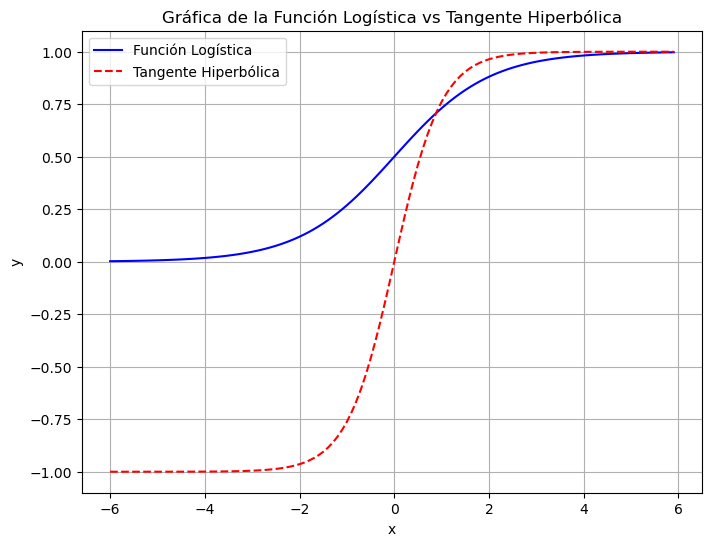

In [22]:
import matplotlib.pyplot as plt


def logistic_function(x):
    return 1 / (1 + np.exp(-x))


x = np.arange(-6, 6, 0.1)
y = logistic_function(x)
yh = np.tanh(x)

plt.figure(figsize=(8, 6))
plt.plot(x, y, label='Función Logística', color='b')
plt.plot(x, yh, label='Tangente Hiperbólica', color='r', linestyle='--')
plt.title('Gráfica de la Función Logística vs Tangente Hiperbólica')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

Eso significa que para todas las entradas mayores que 4, la derivada es aproximadamente 0, y el aprendizaje se detendrá. Además, como podemos observar, la función logística es una curva más "suave", que esperamos que rinda mejor al tener mayor región activa para aceptar valores antes de que desvanezca el gradiente.

Utilizaremos la función logística inter-capas y la función softmax para la salida. Ahora recordamos los datos que tenemos que tratar:

Procedemos a normalizar todas las columnas para centrarlas en 0 reducir su desviación típica a 1

In [23]:
def normalizer(column: pd.Series) -> pd.Series:
    mean = column.mean()
    std = column.std() + 0.0000001  # evitamos dividir entre 0
    normalized_column = (column - mean) / std
    return normalized_column

# No hace falta normalizar la marca de clase, pues es lo que buscamos clasificar
# # Es necesario no contar los -1 y preservarlos, utilizamos un predicado para decidir qué se le aplica a cada valor de la columna
# def marca_de_clase_edad_normalizer(column: pd.Series) -> pd.Series:
#     # Calcula la media y la desviación estándar solo para valores mayores que 0
#     mean = column[column > 0].mean()
#     std = column[column > 0].std() + 0.0000001  # evitamos dividir entre 0
# 
#     # Aplicar normalización solo a los valores mayores que 0, de lo contrario, asignar valor -100
#     normalized_column = np.where(column > 0, (column - mean) / std, column * 100)
# 
#     return pd.Series(normalized_column)

In [24]:
df_2022_normalized = pd.DataFrame()
df_2022_normalized['num_implicados'] = normalizer(df_2022['num_implicados'])
df_2022_normalized['minutes_from_midnight'] = normalizer(df_2022[' minutes_from_midnight'])
df_2022_normalized['cod_distrito'] = normalizer(df_2022['cod_distrito'])
df_2022_normalized['tipo_accidente'] = normalizer(df_2022['tipo_accidente'])
df_2022_normalized['tipo_vehiculo'] = normalizer(df_2022['tipo_vehiculo'])

# No se normalizan los valores binarios, pues perderían su carácter de datos discretos
df_2022_normalized['sexo'] = df_2022['sexo']
df_2022_normalized['positiva_alcohol'] = df_2022['positiva_alcohol']
df_2022_normalized['positiva_droga'] = df_2022['positiva_droga']
df_2022_normalized['bool_laborable'] = df_2022['bool_laborable']

# Aplicamos una función especial para la marca de clase_edad
df_2022_normalized['marca_de_clase_edad'] = df_2022['marca_de_clase_edad']

# Normalizamos las fechas
df_2022_normalized['day'] = normalizer(df_2022['day'])
df_2022_normalized['month'] = normalizer(df_2022['month'])
df_2022_normalized['media_edad_pasajeros'] = normalizer(df_2022['media_edad_pasajeros'])
df_2022_normalized['numero_pasajeros'] = normalizer(df_2022['numero_pasajeros'])
df_2022_normalized.head()

,num_implicados,minutes_from_midnight,cod_distrito,tipo_accidente,tipo_vehiculo,sexo,positiva_alcohol,positiva_droga,bool_laborable,marca_de_clase_edad,day,month,media_edad_pasajeros,numero_pasajeros
0,-0.002793,-2.239508,0.552797,-1.078167,-0.458746,0,0.0,0.0,0,32.0,-1.674393,-1.447023,-0.019446,-0.401461
1,-0.002793,-2.239508,0.552797,-1.078167,-0.458746,1,0.0,0.0,0,47.0,-1.674393,-1.447023,-0.019446,-0.401461
2,-0.002793,-2.413906,-1.207482,-0.640553,-0.193434,1,1.0,0.0,0,32.0,-1.674393,-1.447023,-0.222521,0.497567
3,-0.002793,-2.413906,-1.207482,-0.640553,-0.458746,1,0.0,0.0,0,42.0,-1.674393,-1.447023,-0.222521,0.497567
4,-1.572890,-2.181376,-1.559537,-0.202938,0.071877,0,0.0,0.0,0,-1.0,-1.674393,-1.447023,-1.684658,-0.401461


## Separación
Sacamos los conductores con marca_clase_edad = -1 pues ellos no van a participar en el entrenamiento del modelo.

Creamos el conjunto de entrenamiento    training_set
Creamos el conjunto de validación       test_set
Creamos el conjunto inútilizable        predict_set

El conjunto de validación será elegido por muestra aleatoria simple, y escogemos 80 - 20.
En un futuro se realizará una validación cruzada

In [25]:
to_predict_set = df_2022_normalized[df_2022_normalized['marca_de_clase_edad'] == -1]
df_2022_normalized.drop(to_predict_set.index, inplace=True)
# Se escoge el 20% para validación
test_set = df_2022_normalized.sample(frac=0.2, random_state=1234)  # todo validación cruzada
# Eliminamos los datos de validación para evitar overfitting
training_set = df_2022_normalized.drop(test_set.index)

In [26]:
to_predict_set.head()

,num_implicados,minutes_from_midnight,cod_distrito,tipo_accidente,tipo_vehiculo,sexo,positiva_alcohol,positiva_droga,bool_laborable,marca_de_clase_edad,day,month,media_edad_pasajeros,numero_pasajeros
4,-1.572890,-2.181376,-1.559537,-0.202938,0.071877,0,0.0,0.0,0,-1.0,-1.674393,-1.447023,-1.684658,-0.401461
8,-0.002793,-1.585516,-0.503370,0.234676,-0.458746,1,0.0,0.0,0,-1.0,-1.674393,-1.447023,-1.034819,-0.401461
10,-0.002793,-1.570983,1.784993,0.234676,0.337188,1,0.0,0.0,0,-1.0,-1.674393,-1.447023,-1.928348,-0.401461
13,-0.002793,0.521794,0.024714,0.672290,-0.458746,0,0.0,0.0,0,-1.0,-1.674393,-1.447023,-0.222521,-0.401461
14,-1.572890,-1.585516,1.784993,0.234676,-0.458746,1,0.0,0.0,0,-1.0,-1.674393,-1.447023,-1.542506,0.497567


In [27]:
test_set.head()

,num_implicados,minutes_from_midnight,cod_distrito,tipo_accidente,tipo_vehiculo,sexo,positiva_alcohol,positiva_droga,bool_laborable,marca_de_clase_edad,day,month,media_edad_pasajeros,numero_pasajeros
30815,-1.572890,1.318211,1.784993,1.109905,-0.193434,1,0.0,0.0,0,22.5,-0.422367,1.638453,-1.400354,-1.300488
36737,1.567305,0.260197,-0.855426,1.547519,-0.458746,1,0.0,0.0,1,47.0,-1.219111,-1.447023,0.589778,2.295622
13114,-0.002793,-1.890712,-1.559537,-1.078167,-0.458746,0,1.0,0.0,1,42.0,-0.308547,-0.212833,0.792852,-0.401461
53544,3.137403,-1.105921,1.256909,1.547519,-0.458746,1,0.0,0.0,1,37.0,-0.080905,0.095715,0.021169,2.295622
53712,-0.002793,0.390995,-1.031454,0.672290,-0.458746,1,0.0,0.0,1,32.0,0.032915,0.095715,-0.831745,-0.401461


In [28]:
training_set.head()

,num_implicados,minutes_from_midnight,cod_distrito,tipo_accidente,tipo_vehiculo,sexo,positiva_alcohol,positiva_droga,bool_laborable,marca_de_clase_edad,day,month,media_edad_pasajeros,numero_pasajeros
0,-0.002793,-2.239508,0.552797,-1.078167,-0.458746,0,0.0,0.0,0,32.0,-1.674393,-1.447023,-0.019446,-0.401461
1,-0.002793,-2.239508,0.552797,-1.078167,-0.458746,1,0.0,0.0,0,47.0,-1.674393,-1.447023,-0.019446,-0.401461
2,-0.002793,-2.413906,-1.207482,-0.640553,-0.193434,1,1.0,0.0,0,32.0,-1.674393,-1.447023,-0.222521,0.497567
3,-0.002793,-2.413906,-1.207482,-0.640553,-0.458746,1,0.0,0.0,0,42.0,-1.674393,-1.447023,-0.222521,0.497567
5,-1.572890,-1.861646,1.784993,0.234676,-0.458746,1,0.0,0.0,0,52.0,-1.674393,-1.447023,1.199002,-0.401461


In [29]:
training_set.corr()

,num_implicados,minutes_from_midnight,cod_distrito,tipo_accidente,tipo_vehiculo,sexo,positiva_alcohol,positiva_droga,bool_laborable,marca_de_clase_edad,day,month,media_edad_pasajeros,numero_pasajeros
num_implicados,1.000000,0.045267,0.005475,-0.036569,-0.124675,-0.038568,-0.081408,-0.023722,0.055870,0.043227,-0.006220,-0.021488,0.055027,0.633726
minutes_from_midnight,0.045267,1.000000,0.028055,-0.031360,0.006043,-0.019662,-0.115414,-0.017016,0.066028,-0.002415,-0.006514,0.008026,-0.008681,0.065240
cod_distrito,0.005475,0.028055,1.000000,-0.018989,-0.045188,-0.044459,0.021465,0.013866,0.007186,-0.013432,-0.002502,-0.001275,-0.031425,0.016990
tipo_accidente,-0.036569,-0.031360,-0.018989,1.000000,0.082925,0.021381,0.039964,0.007772,-0.008654,-0.002450,0.003678,0.017965,0.006057,-0.056005
tipo_vehiculo,-0.124675,0.006043,-0.045188,0.082925,1.000000,0.131346,-0.045498,-0.008769,0.022870,-0.030809,0.000975,0.005597,0.012701,-0.110604
sexo,-0.038568,-0.019662,-0.044459,0.021381,0.131346,1.000000,0.056672,0.030453,-0.040912,0.049275,0.001167,0.008796,0.039230,-0.021924
positiva_alcohol,-0.081408,-0.115414,0.021465,0.039964,-0.045498,0.056672,1.000000,0.072524,-0.139975,-0.040084,-0.003217,0.003548,-0.047020,-0.044905
positiva_droga,-0.023722,-0.017016,0.013866,0.007772,-0.008769,0.030453,0.072524,1.000000,-0.014614,-0.020524,0.003378,-0.000826,-0.019610,0.008115
bool_laborable,0.055870,0.066028,0.007186,-0.008654,0.022870,-0.040912,-0.139975,-0.014614,1.000000,0.058804,0.014919,-0.002870,0.082930,-0.030663
marca_de_clase_edad,0.043227,-0.002415,-0.013432,-0.002450,-0.030809,0.049275,-0.040084,-0.020524,0.058804,1.000000,-0.002101,0.003984,0.719744,0.022871


# Modelo clasificatorio multiclass
Para diseñar el modelo seguiremos esta pauta
1. Comenzar Simple:
        Inicializar una red neuronal con una capa oculta.
        Definir una capa de entrada con 14 neuronas (para las 14 entradas) y una capa de salida con 9 neuronas.
        Consideramos que el problema es de clasificación (9 neuronas) y no de regresión (1 neurona) ya que como se ve en la tabla anterior, marca de clase edad no sugiere ninguna correlación estadísticamente significante con ninguna otra variable
2. Evaluar el Rendimiento:
        Dividir los datos en conjuntos de entrenamiento y validación o prueba.
        Entrenar la red neuronal con la estructura inicial en el conjunto de entrenamiento.
        Evaluar el rendimiento de la red en el conjunto de validación utilizando métricas como precisión, recall y F1-score.

3. Evitar el Sobreajuste:
        Observar si hay signos de sobreajuste (diferencia significativa entre el rendimiento en entrenamiento y validación).
        Considerar la adición de técnicas de regularización, como dropout o regularización L2, para evitar el sobreajuste.

4. Incrementar la Complejidad Gradualmente:
        Si la estructura inicial no proporciona un rendimiento satisfactorio, aumentar la complejidad de la red agregando capas ocultas.
        Experimentar con diferentes cantidades de neuronas en cada capa.

5. Experimentar con Hiperparámetros:
        Utilizar búsqueda en cuadrícula o búsqueda aleatoria para explorar diferentes hiperparámetros, incluyendo el número de capas y neuronas.
        Realizar experimentos con diversas configuraciones y registrar el rendimiento.

6. Validación Cruzada:
        Realizar validación cruzada para obtener una estimación más precisa del rendimiento del modelo en diferentes divisiones de datos.

7. Considerar el Conocimiento del Dominio:
        Tomar en cuenta cualquier conocimiento específico del dominio que pueda influir en la elección de la arquitectura de la red.


## Preparaciones iniciales
Se ha elegido para esta implementación, un modelo completamente conectado, donde la información de cada neurona se transmite a la siguiente.
Tal que para las entradas x1 ... xn tendríamos el siguiente modelo: (se cuentan las capadas desde la entrada 1 hasta la salida 3).
La función error será MSE

### Capa 1
Para la neurona f1 ... fn:
f1 = w10 * x0 + w11 * x1 + ... + w1n * xn
fn = w'10 * x0 + w11 * x1 + ... + w1n * xn

El valor de la neurona es sigmoid(fn), donde sigmoid es logistic function
S(x) = e ^ x / (e ^ x + 1)

### Capa 2
Para la neurona g1 ... gn
g1 = w10 * f0 + w11 * f1 + ... + w1n * fn
gn = w'10 * f0 + w11 * f1 + ... + w1n * fn

El valor de la neurona es sigmoid(fn), donde sigmoid es logistic function
S(x) = e^x / (e^x+1)

### Capa 3
Para la neurona h1 ... hn
etc 
h1 = w10 * x0 + w11 * g1 + ... + w1n * gn

## Expresión matricial
Para que sea fácil trabajar con tantos pesos, implementaremos todas las operaciones de forma matricial.

### Matriz de pesos

Denotamos la matriz de los pesos de todas las neuronas de una capa como \( W \), en nuestro caso, una matriz. El input se denota \( X \), en nuestro caso, un vector. El resultado de la computación de una capa es \( Z \).

Por ejemplo, para la capa 1 tenemos:
\[ Z = W \times X \]

Donde

\( X = \begin{bmatrix} x_1 \\ x_2 \\ \vdots \\ x_n \end{bmatrix} \) y \( W = \begin{bmatrix} w_{11} & w_{12} & \cdots & w_{1n} \\ w_{21} & w_{22} & \cdots & w_{2n} \\ \vdots & \vdots & \ddots & \vdots \\ w_{n1} & w_{n2} & \cdots & w_{nn} \end{bmatrix} \)

Si hacemos el producto matricial \( W * X^T \) (trasponiendo \( X \)), obtenemos una matriz de dimensiones \( n_neuronas * n_entradas = Z \).

\[ Z \] es de dimensión \( n * 1 \), y representa la entrada para la siguiente capa.


### Vector sesgo
El vector de los pesos del sesgo se inicializan a 0

## Funciones de apoyo
Se desarrollan las funciones auxiliares para computar los pesos y la salida de cada neurona.
La derivada de la función logística es derv_logistic_function(x)

La función softmax se utiliza para computar el valor más probable en la salida.
La función softmax se define como:

\[ \sigma(z)_i = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}} \]

Donde:
- \( \sigma(z)_i \) es la componente i-ésima de la salida de la función softmax.
- \( z \) es el vector de puntuaciones (logits) de entrada.
- \( K \) es el número de clases (la longitud del vector de puntuaciones).

In [30]:
def logistic_function(x):
    return 1 / (1 + np.exp(-x))


def derv_logistic_function(x):
    return logistic_function(x) * (1 - logistic_function(x))


def compute_output(w: list, x: list) -> float:
    return logistic_function(np.dot(w, x))


def softmax(x):
    """
    Calcula la función softmax para un conjunto de datos. La suma de todos los valores de la salida es 1.
    
    Argumentos:
    - x (ndarray): Vector de salida
    
    Devuelve:
    - ndarray: Un arreglo con las mismas dimensiones de 'x', con las puntuaciones transformadas 
               en probabilidades mediante la función softmax.
    """
    exp_x = np.exp(x)
    # Se usa axis=-1 es que permite que la función np.sum opere a lo largo del último eje de la matriz exp_x, independientemente de la cantidad de ejes que tenga
    return exp_x / np.sum(exp_x, axis=-1, keepdims=True)

### Inicialización de pesos, glorot uniform [Xavier Glorot y Yoshua Bengio 2010].

Esta inicialización se basa en la idea de que los gradientes y las activaciones deben tener varianzas similares en todas las capas, lo que ayuda a tener una propagación más eficiente de los gradientes durante el entrenamiento.

W = random(−6/(n_in + n_out), 6/(n_in + n_out))

Donde:

- **W**: Son los pesos a inicializar.
- **n_in**: es el número de neuronas en la capa anterior (número de entradas de la neurona actual).
- **n_out**: es el número de neuronas en la capa actual (o en la siguiente capa).

Elegimos esta función de inicialización porque es la recomendada para utilizarse con la función logística y evitar la saturación o desvanecimiento del gradiente


In [31]:
from numpy import ndarray


def glorot_uniform(shape: tuple) -> ndarray:
    """
    Realiza la inicialización Glorot Uniform.
    
    Argumentos:
    - shape (tuple): Forma de la matriz de pesos a inicializar, generalmente (n_{in}, n_{out})
    
    Devuelve:
    - ndarray: Matriz de pesos inicializada de n dimensiones
    """
    n_in, n_out = shape
    limit = np.sqrt(6 / (n_in + n_out))

    return np.random.uniform(-limit, limit, shape)

### La función error
La función error elegida será la entropía cruzada categórica, ya que se diseñó específicamente para este uso.
* Incorpora incertidumbre: Penaliza predicciones inconsistentes con etiquetas reales, considerando la incertidumbre.
* Gradientes suaves y bien definidos: Facilita la optimización del modelo durante el entrenamiento.
* Función logarítmica: Utiliza logaritmos para penalizar eficazmente predicciones erróneas con mayor certeza.

In [32]:
def categorical_cross_entropy(y_true, y_pred):
    # Clip predicciones para evitar log(0)
    y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
    # Calcular la entropía cruzada
    loss = -np.sum(y_true * np.log(y_pred))
    return loss

El cómputo de las etiquetas de salida se realiza sobre las marcas de edad

In [33]:
df_2022_normalized['marca_de_clase_edad'].unique()

array([32. , 47. , 42. , 52. , 27. , 22.5, 16. , 37. , 72. , 62. , 57. ,
       19. , 67. , 12. ,  7.5])

In [34]:
# La edad corresponde a [7.5, 12, 16, 19, 22.5, 27, 32, 37, 42, 47, 52, 57, 62, 67, 72]
# Si la edad es 16 ->   [0, 0, 1, 0 etc]
def compute_true(y_true_edad: float) -> list:
    reference = [7.5, 12, 16, 19, 22.5, 27, 32, 37, 42, 47, 52, 57, 62, 67, 72]
    output_vector = np.zeros(len(reference))
    mask = reference == y_true_edad
    output_vector[mask] = 1

    return output_vector

### Retropropagación
Ahora definiremos la función de retropropagación para actualizar los pesos minimizando la función de error elegida. Definimos los pasos de la retropropagación desde la capa de salida hacia las entradas.

La función error elegida es la CCE (categorical cross entropy).
La función de activación final es la softmax.

### Término error Z
La derivada de la CCE sobre el softmax es:
∂zn​∂E​=−∑i=1n ​ti ​⋅σ(z)i​1​⋅∂zn​∂σ(z)i​​
∂zn​∂σ(z)i​​=σ(z)i​⋅(δin​−σ(z)n​)
Donde Zn denota neurona de salida n

Simplificando la expresión queda:
∂zn​∂E​=σ(z)n​−tn​

Ya que para todo i diferente del subíndice de la salida que denota el truth, el término sumatorio de t sub i con la Kronecker delta siempre devolverá t sub n, al solo poder ser 1 cuando tanto t sub i llegue al índice n. Por otro lado, la suma de todas las t sub i por softmax del logit de la neurona n, será siempre el softmax de n, ya que la suma de t sub i es igual a 1. Por lo que la expresión final para el término error Z es:

∂zn​∂E​=σ(z)n​−tn

In [35]:
def __error_term_z(softmax_z: ndarray, truth_z: ndarray) -> ndarray:
    return softmax_z - truth_z

### Término error G

El término error de G sub n es la suma de los términos error de todas las w sub gz n por los términos error Z por la derivada de la activación de G.
La activación de G es el sigmoid y su derivada es sigmoid(g) * (1 - sigmoid(g))

In [36]:
def __error_term_g(sigmoid_g: ndarray, error_term_z: ndarray) -> ndarray:
    derivative = sigmoid_g * (1 - sigmoid_g)
    transposed_output_layer_w = np.transpose(output_layer_w)

    weighted_error_term = np.dot(transposed_output_layer_w, error_term_z)
    error_term = weighted_error_term * derivative
    return error_term

### Término error F

El término error de F es la suma de todos los términos error de todas las w sub fg por los términos G por la derivada de la activación de F que también es sigmoid.

In [37]:
def __error_term_f(sigmoid_f: ndarray, error_term_g: ndarray) -> ndarray:
    derivative = sigmoid_f * (1 - sigmoid_f)
    transposed_second_layer_w = np.transpose(second_layer_w)

    weighted_error_term = np.dot(transposed_second_layer_w, error_term_g)
    error_term = weighted_error_term * derivative
    return error_term

## Inicialización
Inicializamos el modelo secuencial, con capas completamente conectadas. Tenemos en la capa inicial con 14 entradas, y queremos una salida de 15 neuronas. El resultado elegido será el que después de aplicar el softmax, dé el mayor valor. Pero para valuación.

Tendremos 3 capas en total

X -> F -> G -> Z

X inputs
F capa 1
G capa 2
Z outputs

Separamos las etiquetas del training set de los datos a utilizar


In [38]:
training_array_labels = training_set['marca_de_clase_edad'].values
training_set.pop('marca_de_clase_edad')
training_array_data = training_set.values
training_array_data

array([[-0.00279261, -2.2395083 ,  0.55279749, ..., -1.4470232 ,
        -0.01944615, -0.40146072],
       [-0.00279261, -2.2395083 ,  0.55279749, ..., -1.4470232 ,
        -0.01944615, -0.40146072],
       [-0.00279261, -2.41390632, -1.20748154, ..., -1.4470232 ,
        -0.22252079,  0.49756681],
       ...,
       [-0.00279261,  1.56818187,  1.0808812 , ...,  0.71281021,
         0.18362848,  0.49756681],
       [-1.57289043,  0.05673234, -0.85542573, ...,  0.71281021,
         0.18362848, -1.30048826],
       [-1.57289043,  1.36471751, -0.32734202, ...,  0.71281021,
        -0.22252079, -1.30048826]])

## Forward pass
Calculamos el vector salida resultante de aplicar las entradas con los pesos de f. Utilizamos el operador punto.
Como las entradas para los bias son siempre 1, el cómputo es irrelevante y solo hace falta sumar los pesos de los bias al final de la operación

In [39]:
historical_error_data = []
learning_rate = 0.0001
epochs = 250

In [41]:
first_layer_w = glorot_uniform((13, 13))
second_layer_w = glorot_uniform((13, 13))
output_layer_w = glorot_uniform((15, 13))

first_layer_bias = np.zeros((13,))
second_layer_bias = np.zeros((13,))
output_layer_bias = np.zeros((15,))

def __compute_layer(input_vector: ndarray, bias_weights: ndarray, weights: ndarray, ) -> ndarray:
    return weights @ input_vector + bias_weights


def weight_adjust_matrix(error_term: ndarray, vector: ndarray) -> ndarray:
    weight_adjust_ndarray = []

    for term in error_term:
        row = [-learning_rate * term * previous_input for previous_input in vector]
        weight_adjust_ndarray.append(row)

    return np.array(weight_adjust_ndarray)


def forward_pass():
    global historical_error_data
    
    for epoch in range(epochs):
        label_index = 0
        for input_vector in training_array_data:
            input_vector = np.array(input_vector, dtype=float)

            vector_first = __compute_layer(input_vector, bias_weights=first_layer_bias, weights=first_layer_w)
            vector_first = logistic_function(vector_first)

            vector_second = __compute_layer(vector_first, bias_weights=second_layer_bias, weights=second_layer_w)
            vector_second = logistic_function(vector_second)

            vector_out = __compute_layer(vector_second, bias_weights=output_layer_bias, weights=output_layer_w)
            vector_out = softmax(vector_out)

            label = compute_true(training_array_labels[label_index])

            backward_pass(epoch, label, label_index, vector_out, vector_first, vector_second, input_vector)
            label_index += 1

def backward_pass(epoch, label: ndarray, label_index, vector_out: ndarray, vector_first, vector_second, vector_inputs) -> None:
    global historical_error_data
    # Guardamos un histórico de errores
    categorical_cross_entropy_error = categorical_cross_entropy(y_true=label, y_pred=vector_out)
    historical_error_data = np.append(historical_error_data, categorical_cross_entropy_error)

    error_term_z = __error_term_z(softmax_z=vector_out, truth_z=label)
    z_weight_adjust = weight_adjust_matrix(error_term=error_term_z, vector=vector_second)
    z_bias_weight_adjust = (-learning_rate * error_term_z)

    error_term_g = __error_term_g(sigmoid_g=vector_second, error_term_z=error_term_z)
    g_weight_adjust = weight_adjust_matrix(error_term=error_term_g, vector=vector_first)
    g_bias_weight_adjust = -learning_rate * np.transpose(error_term_g)

    error_term_f = __error_term_f(sigmoid_f=vector_first, error_term_g=error_term_g)
    f_weight_adjust = weight_adjust_matrix(error_term=error_term_f, vector=vector_inputs)
    f_bias_weight_adjust = -learning_rate * np.transpose(error_term_f)

    update_weights(f_bias_weight_adjust, f_weight_adjust, g_bias_weight_adjust, g_weight_adjust, z_bias_weight_adjust,
                   z_weight_adjust)
    
    if categorical_cross_entropy_error == 0:
        raise Exception
    
    print(f"{epoch}: {label_index} {categorical_cross_entropy_error}")


def update_weights(f_bias_weight_adjust, f_weight_adjust, g_bias_weight_adjust, g_weight_adjust, z_bias_weight_adjust,
                   z_weight_adjust):
    global first_layer_bias
    global first_layer_w
    global second_layer_bias
    global second_layer_w
    global output_layer_bias
    global output_layer_w

    first_layer_bias = first_layer_bias + f_bias_weight_adjust
    first_layer_w = first_layer_w + f_weight_adjust

    second_layer_bias = second_layer_bias + g_bias_weight_adjust
    second_layer_w = second_layer_w + g_weight_adjust

    output_layer_bias = output_layer_bias + z_bias_weight_adjust
    output_layer_w = output_layer_w + z_weight_adjust


forward_pass()

0: 0 3.0994511542330656
0: 1 3.8411234096489726
0: 2 3.109334054699909
0: 3 3.6040977717364777
0: 4 2.2232242209376087
0: 5 3.804841436243205
0: 6 3.5482624624286845
0: 7 2.652845300948641
0: 8 2.5998520464989157
0: 9 2.6681048752414567
0: 10 2.6345134435009148
0: 11 3.6332152411163046
0: 12 3.097296908395576
0: 13 3.889311232780433
0: 14 3.5801087801754026
0: 15 2.2400335095845207
0: 16 3.935111600945874
0: 17 3.9287093397835613
0: 18 2.6872091090574366
0: 19 3.7770033232721394
0: 20 2.250166577655984
0: 21 3.7924963258384388
0: 22 3.502954815592049
0: 23 2.994596940994728
0: 24 2.4718650099465984
0: 25 3.641969698732051
0: 26 3.6580981766904888
0: 27 2.2318908031020723
0: 28 2.643693047949635
0: 29 2.638416227016829
0: 30 3.8679899675610923
0: 31 2.6590997045006786
0: 32 3.5563631550683503
0: 33 2.4836803030257606
0: 34 2.928329016402965
0: 35 3.607135371193356
0: 36 1.7405857569270553
0: 37 3.136716103602724
0: 38 2.682602301525137
0: 39 2.473593386021055
0: 40 2.6738069424150583
0:

KeyboardInterrupt: 